# Del 4: Strojno učenje: K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

## Introduction to K-Nearest Neighbors

### Problem definition

### Introduction to the data

In [2]:
import pandas as pd

dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [3]:
dc_listings.head(3)

host_response_rate host_acceptance_rate  host_listings_count  accommodates  \
0                92%                  91%                   26             4   
1                90%                 100%                    1             6   
2                90%                 100%                    2             1   

         room_type  bedrooms  bathrooms  beds    price cleaning_fee  \
0  Entire home/apt       1.0        1.0   2.0  $160.00      $115.00   
1  Entire home/apt       3.0        3.0   3.0  $350.00      $100.00   
2     Private room       1.0        2.0   1.0   $50.00          NaN   

  security_deposit  minimum_nights  maximum_nights  number_of_reviews  \
0          $100.00               1            1125                  0   
1              NaN               2              30                 65   
2              NaN               2            1125                  1   

    latitude  longitude         city zipcode state  
0  38.890046 -77.002808   Washington   20003    DC  
1  38.880413 -76.990485   Washington   20003    DC  
2  38.955291 -76.986006  Hyattsville   20782    MD

### K-nearest neighbors

### Euclidean distance

In [4]:
import numpy as np

our_acc_value = 3

In [5]:
first_value = dc_listings.iloc[0]['accommodates']

In [6]:
first_value

4

In [7]:
np.abs(first_value-our_acc_value)

1

### Calculate distance for all observations

In [9]:
import numpy as np

new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x-new_listing))



In [10]:
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

### Randomizing, and sorting

In [11]:
import numpy as np

np.random.seed(1)



In [12]:
np.random.permutation(5)

array([2, 1, 4, 0, 3])

In [13]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [14]:
dc_listings = dc_listings.sort_values('distance')

In [15]:
dc_listings.head(10)['price']

2926     $99.00
75       $99.00
1074    $125.00
115     $569.00
1080    $246.00
3042     $95.00
2384    $169.00
626     $130.00
3226     $91.00
1467     $94.00
Name: price, dtype: object

### Average price

In [16]:
dc_listings['price'] = dc_listings['price'].str.replace(',','').str.replace('$','').astype('float')

In [17]:
dc_listings.head(10)['price']

2926     99.0
75       99.0
1074    125.0
115     569.0
1080    246.0
3042     95.0
2384    169.0
626     130.0
3226     91.0
1467     94.0
Name: price, dtype: float64

In [19]:
mean_price = dc_listings.iloc[0:5]['price'].mean()
mean_price

227.6

### Function to make predictions

In [20]:
np.random.seed(1)

dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [23]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbours = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbours.mean()
    return predicted_price
    
   






In [24]:
acc_one = predict_price(1)

In [25]:
acc_one

68.0

In [26]:
acc_two = predict_price(2)

In [27]:
acc_two

112.8

In [28]:
acc_four = predict_price(4)

In [29]:
acc_four

124.8

## Evaluating Model Performance

### Testing quality of predictions

In [30]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("data/dc_airbnb.csv")

In [31]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [32]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [33]:
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

In [35]:
test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [37]:
test_df.head(3)

host_response_rate host_acceptance_rate  host_listings_count  \
2792                20%                  75%                    1   
2793               100%                  25%                    2   
2794                NaN                  NaN                    1   

      accommodates        room_type  bedrooms  bathrooms  beds  price  \
2792             2  Entire home/apt       0.0        1.0   1.0  120.0   
2793             3  Entire home/apt       2.0        2.0   1.0  140.0   
2794             4  Entire home/apt       2.0        1.0   1.0  299.0   

     cleaning_fee security_deposit  minimum_nights  maximum_nights  \
2792          NaN              NaN               1            1125   
2793       $75.00          $150.00               2            1125   
2794          NaN              NaN               2            1125   

      number_of_reviews   latitude  longitude        city zipcode state  \
2792                  8  38.922187 -77.032475  Washington   20009    DC   
2793                  7  38.931681 -77.044739  Washington   20010    DC   
2794                  5  38.933765 -77.031488  Washington   20010    DC   

      predicted_price  
2792            104.0  
2793            177.4  
2794            145.8

### Error Metrics

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

In [38]:
test_df['error'] = np.absolute(test_df['price'] - test_df['predicted_price'])

In [39]:
mae = test_df['error'].mean()

In [40]:
mae

56.29001074113876

###  Mean Squared Error

$MSE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2}$

In [46]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [47]:
mse = test_df['squared_error'].mean()

In [48]:
mse

18646.525370569325

### Training another model

In [49]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [50]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

In [53]:
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

In [54]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [55]:
mse

18646.525370569325

### Root Mean Squared Error

In [56]:
rmse = mse**(1/2)
rmse

136.55228072269364

### Comparing MAE and RMSE

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

$RMSE = \sqrt { \frac{ \sum_{k=1}^{n} (actual_1 - predicted_1)^2 + \cdots + (actual_n - predicted_n)^2 } {n} }$

In [57]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [58]:
mae_one = errors_one.mean()

In [59]:
rmse_one = (errors_one**2).mean()**(1/2)

In [60]:
mae_one

7.5

In [61]:
rmse_one

7.905694150420948

In [62]:
mae_two = errors_two.sum()/len(errors_two)

In [63]:
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))

In [64]:
mae_two

62.5

In [65]:
rmse_two

235.82302686548658

## Multivariate K-Nearest Neighbors

In [66]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [67]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [68]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [69]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude          

### Removing features

In [70]:
dc_listings.head(2)

host_response_rate host_acceptance_rate  host_listings_count  \
574                100%                 100%                    1   
1593                87%                 100%                    2   

      accommodates     room_type  bedrooms  bathrooms  beds  price  \
574              2  Private room       1.0        1.0   1.0  125.0   
1593             2  Private room       1.0        1.5   1.0   85.0   

     cleaning_fee security_deposit  minimum_nights  maximum_nights  \
574           NaN          $300.00               1               4   
1593       $15.00              NaN               1              30   

      number_of_reviews   latitude  longitude        city zipcode state  
574                 149  38.913548 -77.031981  Washington   20009    DC  
1593                 49  38.953431 -77.030695  Washington   20011    DC

In [71]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count']

In [72]:
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [73]:
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

### Handling missing values

In [74]:
drop_columns = ['cleaning_fee', 'security_deposit']
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [75]:
dc_listings.isnull().sum()

accommodates          0
bedrooms             21
bathrooms            27
beds                 11
price                 0
minimum_nights        0
maximum_nights        0
number_of_reviews     0
dtype: int64

In [76]:
dc_listings = dc_listings.dropna(axis = 0)

In [77]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [79]:
dc_listings.head(3)

accommodates  bedrooms  bathrooms  beds  price  minimum_nights  \
574              2       1.0        1.0   1.0  125.0               1   
1593             2       1.0        1.5   1.0   85.0               1   
3091             1       1.0        0.5   1.0   50.0               1   

      maximum_nights  number_of_reviews  
574                4                149  
1593              30                 49  
3091            1125                  1

### Normalize columns

In [80]:
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()

In [81]:
normalized_col = first_transform / first_transform.std()

In [82]:
normalized_col[0:5]

574    -0.016604
1593   -0.016603
3091   -0.016573
420    -0.016584
808    -0.016553
Name: maximum_nights, dtype: float64

In [85]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()

In [86]:
normalized_listings.head()

accommodates  bedrooms  bathrooms      beds     price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858 -0.173345       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858 -0.464148       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858 -0.718601       -0.341375   
420      -0.596544 -0.249467  -0.439151 -0.546858  0.437342        0.487635   
808       4.393004  4.507903   1.264998  2.829956  0.480962       -0.065038   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  
420        -0.016584          -0.448301  
808        -0.016553           0.646219

In [87]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()
normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858  125.0       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858   85.0       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858   50.0       -0.341375   
420      -0.596544 -0.249467  -0.439151 -0.546858  209.0        0.487635   
808       4.393004  4.507903   1.264998  2.829956  215.0       -0.065038   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  
420        -0.016584          -0.448301  
808        -0.016553           0.646219

### Euclidean distance for multivariate case

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }
$

In [88]:
from scipy.spatial import distance

In [89]:
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)
dist

0.852074

In [90]:
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]

In [91]:
first_listing

accommodates   -0.596544
bathrooms      -0.439151
Name: 574, dtype: float64

In [92]:
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

In [93]:
fifth_listing

accommodates    4.393004
bathrooms       1.264998
Name: 808, dtype: float64

In [94]:
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)

In [95]:
first_fifth_distance

5.272543124668404

### Introduction to scikit-learn

In [96]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [97]:
knn = KNeighborsRegressor(algorithm='brute')

###  Fitting a model and making predictions

In [98]:
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [99]:
train_features = train_df[['accommodates', 'bathrooms']]

In [100]:
train_target = train_df['price']

In [101]:
knn.fit(train_features, train_target)

KNeighborsRegressor(algorithm='brute')

In [102]:
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [103]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

In [104]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

In [105]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)

In [106]:
train_feature = train_df[train_columns]
train_target = train_df['price']

knn.fit(train_feature, train_target)

KNeighborsRegressor(algorithm='brute')

In [107]:
predictions = knn.predict(test_df[train_columns])

In [108]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

### Calculating MSE using Scikit-Learn

In [109]:
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']



In [110]:
two_features_mse = mean_squared_error(test_df['price'], predictions)

In [111]:
two_features_mse

15600.51385665529

In [112]:
two_features_rmse = two_features_mse**(1/2)

In [113]:
two_features_rmse

124.90201702396679

### Using more features

In [114]:
features = ['accommodates', 'bedrooms', 
            'bathrooms', 'number_of_reviews']

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) **(1/2)

In [118]:
four_features_rmse

115.42284176217056

In [117]:
four_mse = mean_squared_error(test_df['price'], four_predictions)

NameError: name 'four_predictions' is not defined

In [ ]:
four_mse

In [ ]:
four_rmse = four_mse ** (1/2)

In [ ]:
four_rmse

### Using all features

In [119]:
features = train_df.columns.tolist()
features.remove('price')

In [120]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) **(1/2)

In [121]:
four_features_rmse

124.31924883701363

In [ ]:
#če vklopimo vsa polja je napoved slabša

In [ ]:
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)

In [ ]:
all_features_mse

In [ ]:
all_features_rmse = all_features_mse ** (1/2)

In [ ]:
all_features_rmse

## Hyperparameter Optimization

In [122]:
import pandas as pd

In [123]:
train_df = pd.read_csv('data/dc_airbnb_train.csv') 

In [124]:
test_df = pd.read_csv('data/dc_airbnb_test.csv')

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [137]:
hyper_params = list(range(1,21))

In [138]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [139]:
rmse_values = list()

In [140]:
for hp in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=hp)
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) **(1/2)
    rmse_values.append(rmse)

In [141]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818,
 116.8644114827833,
 119.5335680743671,
 121.87472331580857,
 121.12320961628912,
 121.00599769826847,
 121.3839832139696,
 121.87927087700685,
 121.3802368756651,
 121.56469838918429,
 121.53651569258713,
 121.94334139200811,
 121.78915596074519,
 121.58779942206421,
 121.55490412561835,
 121.14845432917468]

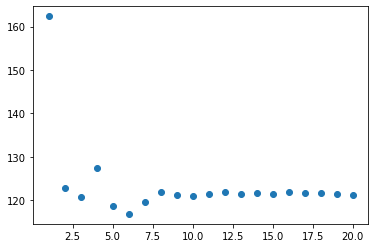

In [142]:
import matplotlib.pyplot as plt
plt.scatter(x = hyper_params, y=rmse_values)
plt.show()

### Expanding grid search

In [ ]:
hyper_params = list(range(1,21))
mse_values = list()
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [ ]:
mse_values

### Visualizing hyperparameter values

### Varying features and hyperparameters

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [ ]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the workflow

In [ ]:
two_features = ['accommodates', 'bathrooms']

In [ ]:
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

## Cross Validation

In [ ]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [ ]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

In [ ]:
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

### Holdout Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [ ]:
# First half
model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one["predicted_price"] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one["predicted_price"])**(1/2)

In [ ]:
iteration_one_rmse

In [ ]:
# Second half
model = KNeighborsRegressor()
model.fit(train_two[['accommodates']], train_two['price'])
test_two["predicted_price"] = model.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], test_two["predicted_price"])**(1/2)

In [ ]:
iteration_two_rmse

In [ ]:
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

In [ ]:
avg_rmse

### K-Fold Cross Validation

In [ ]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [ ]:
dc_listings['fold'].value_counts()

In [ ]:
dc_listings['fold'].isnull().sum()

### First iteration

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error






### Function for training models

In [ ]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

In [ ]:
def train_and_validate(df, folds):


In [ ]:
rmses = train_and_validate(dc_listings, fold_ids)

In [ ]:
rmses

In [ ]:
avg_rmse = np.mean(rmses)

In [ ]:
avg_rmse

###  Performing K-Fold Cross Validation Using Scikit-Learn

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

###  Exploring Different K Values

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]



###  Bias-Variance Tradeoff

## Vaja: Predicting Car Prices

### Introduction To The Data Set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# imena stolpcev

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
cars = pd.read_csv('data/imports-85.data', names=cols)

In [ ]:
# Select only the columns with continuous values from
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']



In [ ]:
numeric_cars.head()

### Data Cleaning

### Univariate Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



### Multivariate Model

### Hyperparameter Tuning